In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
mcd=pd.read_csv('/content/mcdonalds.csv')

In [ ]:
mcd.head

<bound method NDFrame.head of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gende

In [ ]:
data=mcd.iloc[:,1:11]
data.head()

,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [ ]:
li=['convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']
for i in range(len(li)):
  mcd[li[i]]=np.where(mcd[li[i]]=='Yes',1,0)

In [ ]:
mcd.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,1,0,1,0,1,1,0,1,0,0,-3,61,1,Female
1,Yes,1,0,1,1,1,1,1,1,0,0,+2,51,1,Female
2,No,1,1,1,1,1,0,1,1,1,0,+1,62,1,Female
3,Yes,1,0,1,1,1,1,1,0,0,1,+4,69,5,Female
4,No,1,0,1,1,1,1,0,0,1,0,+2,49,2,Male


In [ ]:
mcd.replace({'VisitFrequency':{'Every three months':1,'Never':0,'Once a month':2,'Once a year':3,'More than once a week':4,'Once a week':5}},inplace=True)


In [73]:
mcd.replace({'Like':{'I love it!+5':'5','I hate it!-5':'-5'}},inplace=True)

In [72]:
mcd['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [ ]:
from sklearn.cluster import KMeans

In [17]:
categorical = mcd.drop(['Gender','VisitFrequency','Like','Age'],axis=1)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in categorical.columns:
    categorical[i] = label_encoder.fit_transform(categorical[i])

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
data_predict = kmeans.fit_predict(categorical)



In [22]:
kmeans.labels_

array([0, 4, 2, ..., 2, 6, 1], dtype=int32)

In [23]:
kmeans.cluster_centers_

array([[ 8.00000000e-02,  8.88000000e-01,  4.00000000e-02,
         8.00000000e-01,  0.00000000e+00,  9.28000000e-01,
         7.60000000e-01,  8.00000000e-03,  4.00000000e-02,
         8.00000000e-02,  2.64000000e-01],
       [ 2.70270270e-02,  5.40540541e-01,  8.10810811e-02,
         9.45945946e-01,  8.31081081e-01,  6.75675676e-01,
         4.05405405e-02,  1.01351351e-01,  9.66216216e-01,
         2.70270270e-02,  1.00000000e+00],
       [ 8.47107438e-01,  9.58677686e-01,  9.91735537e-02,
         8.92561983e-01,  5.16528926e-01,  8.59504132e-01,
        -8.88178420e-16,  1.00000000e+00,  1.00000000e+00,
         2.02479339e-01,  7.02479339e-02],
       [ 2.08791209e-01,  9.45054945e-01,  7.69230769e-02,
         8.79120879e-01,  5.82417582e-01,  8.13186813e-01,
         1.09890110e-02,  6.66133815e-16,  8.46153846e-01,
         1.31868132e-01, -2.22044605e-16],
       [ 8.32167832e-01,  9.82517483e-01,  1.22377622e-01,
         9.82517483e-01,  1.00000000e+00,  9.47552448e-01,
  

In [28]:
data_predict.size

1453

In [58]:
avg=np.zeros(8,dtype=int)

In [57]:
count=np.zeros(8,dtype=int)

In [60]:
for d in range(mcd.shape[0]):
  val=data_predict[d]
  avg[val]=avg[val]+mcd['VisitFrequency'][d]
  count[val]+=1
  
  

In [74]:
avg_like=np.zeros(8,dtype=float)
count_like=np.zeros(8,dtype=int)
for d in range(mcd.shape[0]):
  val=data_predict[d]
  avg_like[val]=avg[val]+int(mcd['Like'][d])
  count_like[val]+=1

In [64]:
avg=avg/count

In [75]:
avg_like=avg_like/count_like

In [70]:
int(mcd['Like'][0])

-3

In [65]:
print(avg)

[2.056      1.61486486 2.5661157  2.18681319 2.59440559 1.69142857
 2.82       2.5       ]


In [76]:
print(avg_like)

[ 0.024448   -0.00935902  0.02300048  0.05699795  0.01256785  0.01537959
  0.04546667  0.0190678 ]


In [31]:
np.unique(data_predict)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

For gender

In [77]:

count_gender=np.zeros(8,dtype=int)
for d in range(mcd.shape[0]):
  val=data_predict[d]
  if mcd['Gender'][d]=='Female':
  
    count_gender[val]+=1
    

In [78]:
count_gender=count_gender/1453

In [79]:
print(count_gender)

[0.04679972 0.04060564 0.07914659 0.02959394 0.11355816 0.07157605
 0.0660702  0.09497591]


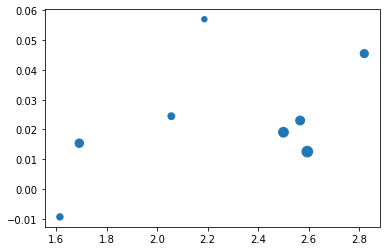

In [83]:
plt.scatter(avg,avg_like,s=1000*count_gender)
plt.show()